# Employee attrition data set EDA

In [2]:
#importing modules for data cleaning and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning 

In [3]:
##Loading data set to pandas frame 
df= pd.read_csv('HR_Employee_Attrition_Data.csv')

In [6]:
## getting a sense of columns and type of data it holds
import warnings ##To suppress warning 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100) # to avoid trunc data in data frame 
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
#Data seems to have categorical and continues values checking for data types of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [12]:
# exploring the target variable
print("Target columns has ",df.Attrition.unique()," values")
print(df.Attrition.value_counts())
print("proportion of Target columns is imbalanced")

Target columns has  ['Yes' 'No']  values
No     2466
Yes     474
Name: Attrition, dtype: int64
proportion of Target columns is imbalanced


In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
# exploring which columns can be classified has categorical 
df.Education.value_counts()
#some columns have already been discretised with dummy values as an example below 

3    1144
4     796
2     564
1     340
5      96
Name: Education, dtype: int64

In [18]:
# Writing small script to identify the columns which have strings for classifying them to categorical data 
str_cols=[]
for i in range(35):
    if isinstance(df.iloc[0,i],str):
        str_cols.append(df.columns.to_list()[i])
    else:
        pass
print("columns with strings categorical values ",str_cols)
##checking against the columns 
df.head(3)
##The identified columns to be used for one-hot coding / pandas dummy methods for mapping categorical values to numricals
## incase we decide to go with lienar modesl else they can stay put as they are NOTE the conversion does not transform the 
##the data just encodes the data into numercial format for model to handle

columns with strings categorical values  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [23]:
### how many unique values do each columns holds
for cols in df.columns.to_list():
    #if df[cols].dtypes== 'object':
    unique = len(df[cols].unique())
    print("Feature '{}' has {} unique categories".format(cols,unique))

Feature 'Age' has 43 unique categories
Feature 'Attrition' has 2 unique categories
Feature 'BusinessTravel' has 3 unique categories
Feature 'DailyRate' has 886 unique categories
Feature 'Department' has 3 unique categories
Feature 'DistanceFromHome' has 29 unique categories
Feature 'Education' has 5 unique categories
Feature 'EducationField' has 6 unique categories
Feature 'EmployeeCount' has 1 unique categories
Feature 'EmployeeNumber' has 2940 unique categories
Feature 'EnvironmentSatisfaction' has 4 unique categories
Feature 'Gender' has 2 unique categories
Feature 'HourlyRate' has 71 unique categories
Feature 'JobInvolvement' has 4 unique categories
Feature 'JobLevel' has 5 unique categories
Feature 'JobRole' has 9 unique categories
Feature 'JobSatisfaction' has 4 unique categories
Feature 'MaritalStatus' has 3 unique categories
Feature 'MonthlyIncome' has 1349 unique categories
Feature 'MonthlyRate' has 1427 unique categories
Feature 'NumCompaniesWorked' has 10 unique categories
F

In [29]:
##Clearly from above we have "Over 18", "Employee Number"-> almost the length of data frame,"employee count" , 
##"Over18",'StandardHours' eitr unique value is 1 upon closer observation these cols do not add any value to analysis
## hence dropping them in X Data Frame
drop_cols = [x for x in df.columns.to_list() if (len(df[x].unique())<=1 or len(df[x].unique())==len(df)) ]
X = df.drop(columns=drop_cols)
X

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [36]:
##checking for null values. 
np.array((X.isnull().sum()))
## data does not seem to have any null values luckily cleaned set of data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Data Visualisation 

###### Categorical features visualisation 

In [515]:
# data preparation 
below_five = []
#above_five_ = []
for cols in df.columns.to_list():
    #if df[cols].dtypes== 'object':
    unique = len(df[cols].unique())
    if 1 < unique <=5:
        below_five.append(cols)
        print("Feature '{}' has {} unique categories".format(cols,unique))
reshape_five = np.array(below_five).reshape(5,3)


Feature 'Attrition' has 2 unique categories
Feature 'BusinessTravel' has 3 unique categories
Feature 'Department' has 3 unique categories
Feature 'Education' has 5 unique categories
Feature 'EnvironmentSatisfaction' has 4 unique categories
Feature 'Gender' has 2 unique categories
Feature 'JobInvolvement' has 4 unique categories
Feature 'JobLevel' has 5 unique categories
Feature 'JobSatisfaction' has 4 unique categories
Feature 'MaritalStatus' has 3 unique categories
Feature 'OverTime' has 2 unique categories
Feature 'PerformanceRating' has 2 unique categories
Feature 'RelationshipSatisfaction' has 4 unique categories
Feature 'StockOptionLevel' has 4 unique categories
Feature 'WorkLifeBalance' has 4 unique categories


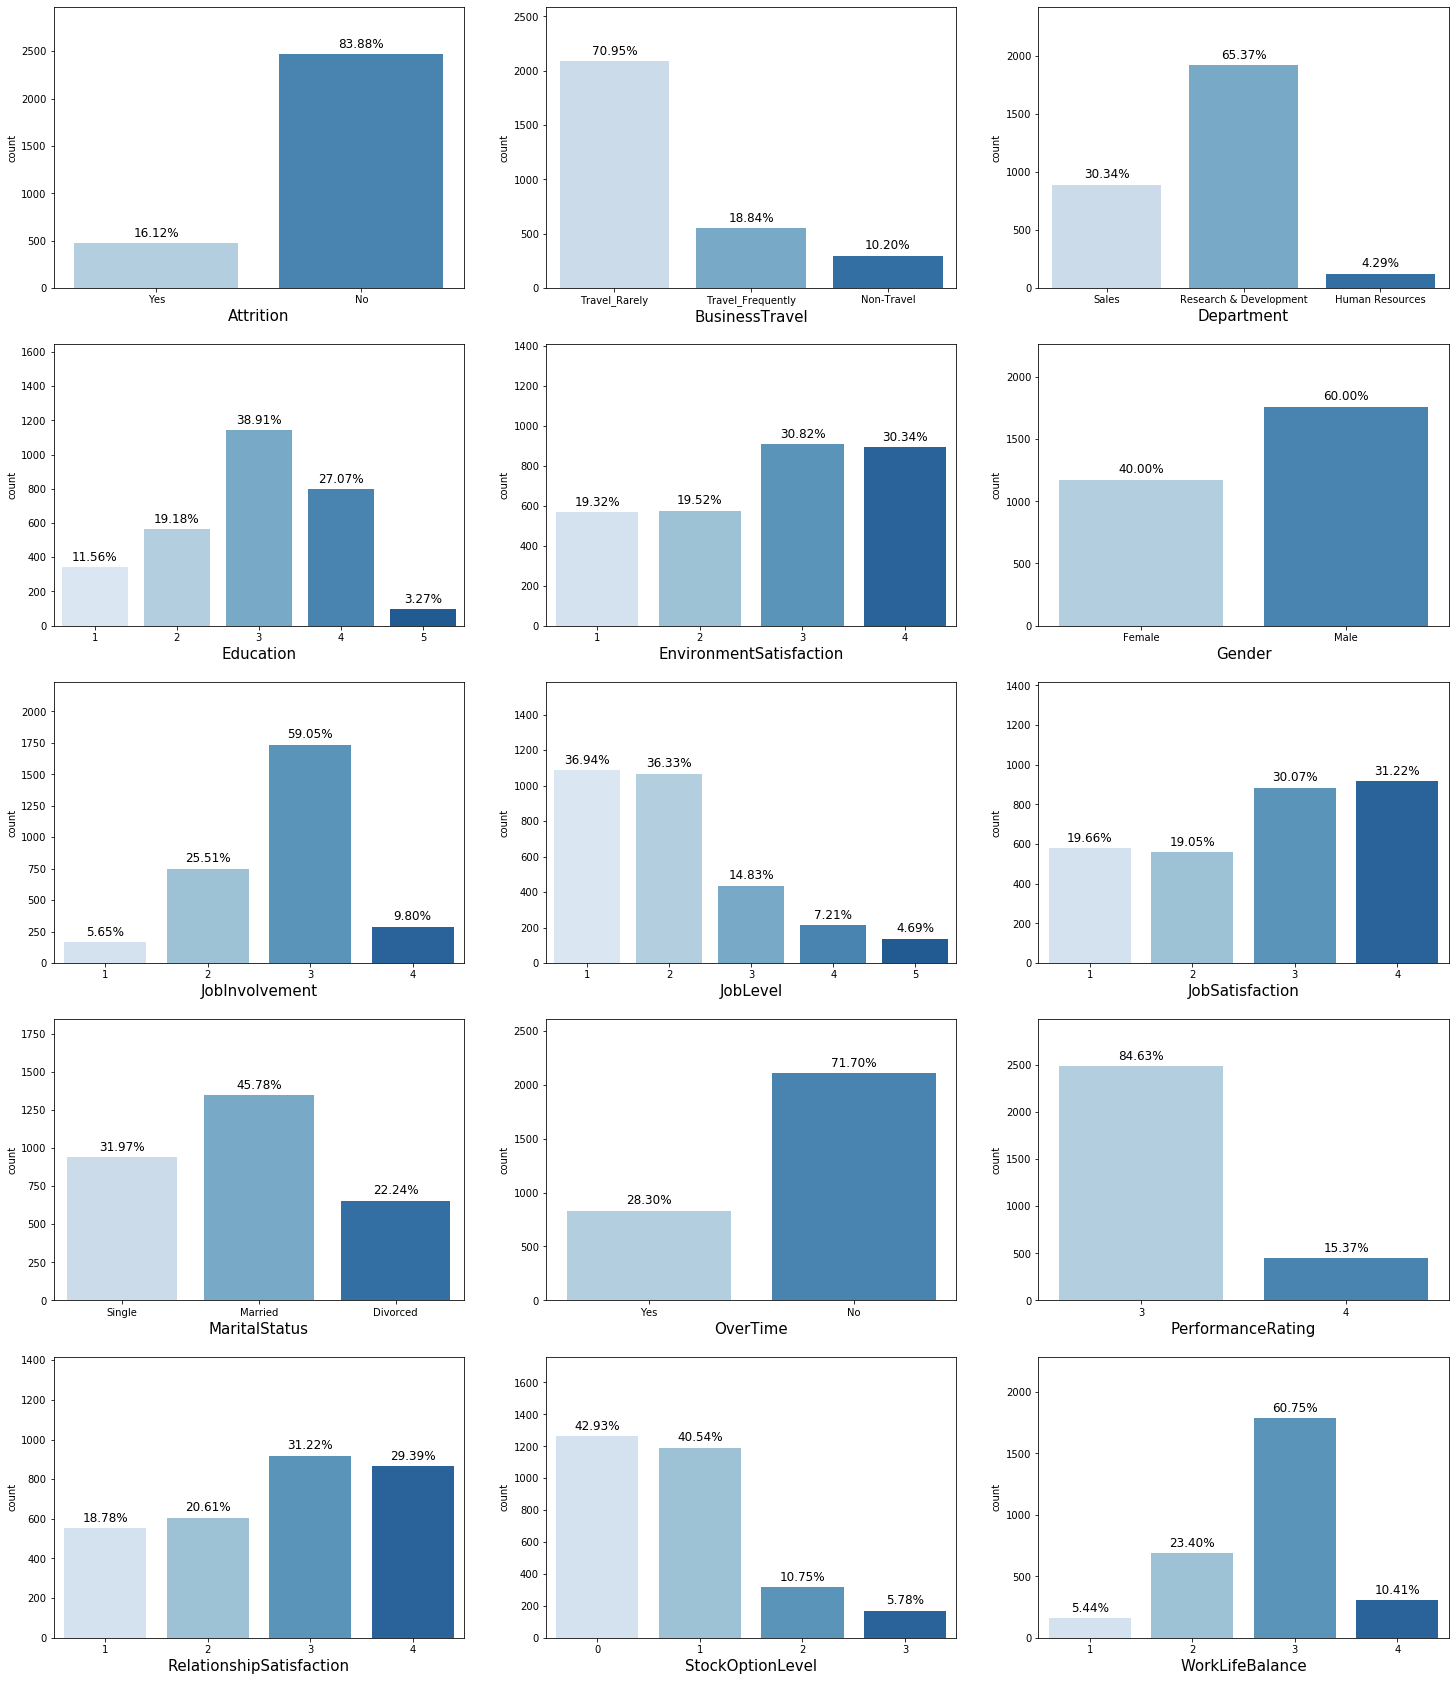

In [514]:
fig,axes = plt.subplots(5,3,figsize=(25,30))
for i in range(5):
    for j in range(3):
            #sns.countplot(df[sns_cols[i][j]],hue=df['Attrition'],ax=axes[i,j])
        axes[i][j].set_xlabel(reshape_five[i][j],fontsize=15)
        axes[i][j].set_ylabel("Attrition Count")
        axes[i][j].set_ylim(0,max(df[reshape_five[i][j]].value_counts())+500)
        p = sns.countplot(df[reshape_five[i][j]],ax=axes[i,j],palette="Blues")
        for x in p.patches:
            p.annotate(str(format(x.get_height()/len(df)*100,'.2f'))+"%",(x.get_x()+x.get_width() / 2.,x.get_height()),
                           ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=12,fontweight='normal')
    
plt.show()  
#Visual identify the distribution of each categorical features distribution in percentage

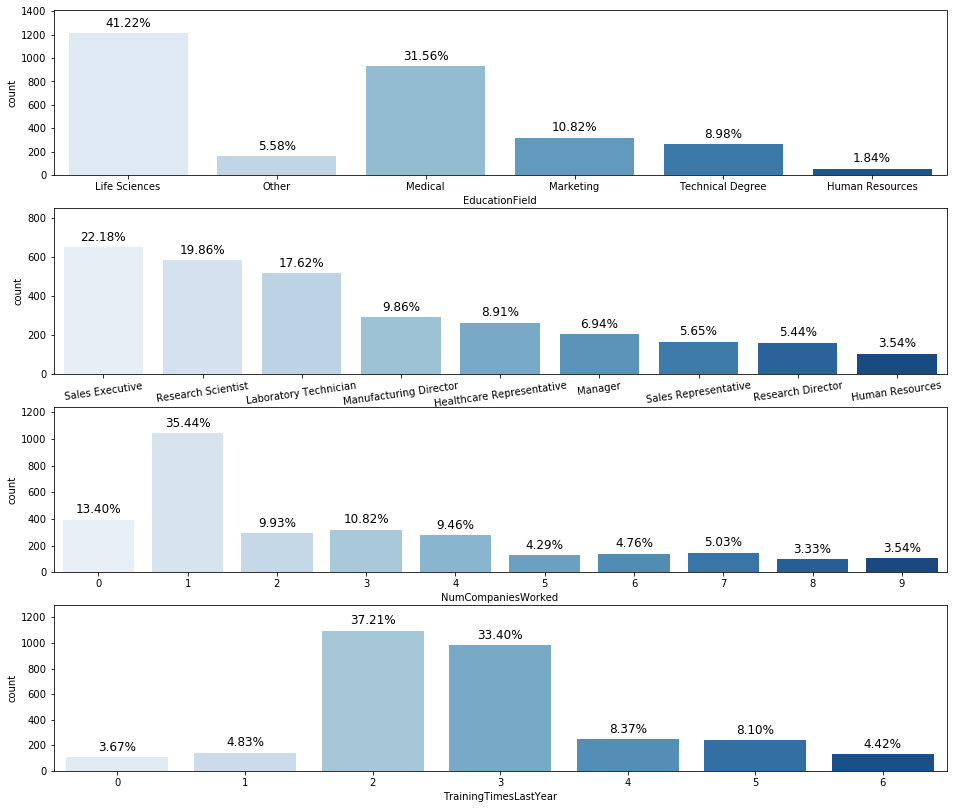

In [531]:
## Visualising Feature with caategories more then 5 
above5_ = [x for x in list(df.columns) if (len(df[x].unique()) > 5 and len(df[x].unique())<=10) ]
above5_

fig,axes = plt.subplots(4,1,figsize=(16,14))

for i in range(len(above5_)):
    axes[i].set_ylim(0,max(df[above5_[i]].value_counts())+200)
    if above5_[i]=='JobRole':
        plt.setp(axes[i].get_xticklabels(),rotation=8)
    p = sns.countplot(df[above5_[i]],ax=axes[i],palette="Blues")
    for x in p.patches:
                p.annotate(str(format(x.get_height()/len(df)*100,'.2f'))+"%",(x.get_x()+x.get_width() / 2.,x.get_height()),
                           ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=12,fontweight='normal')
plt.show()

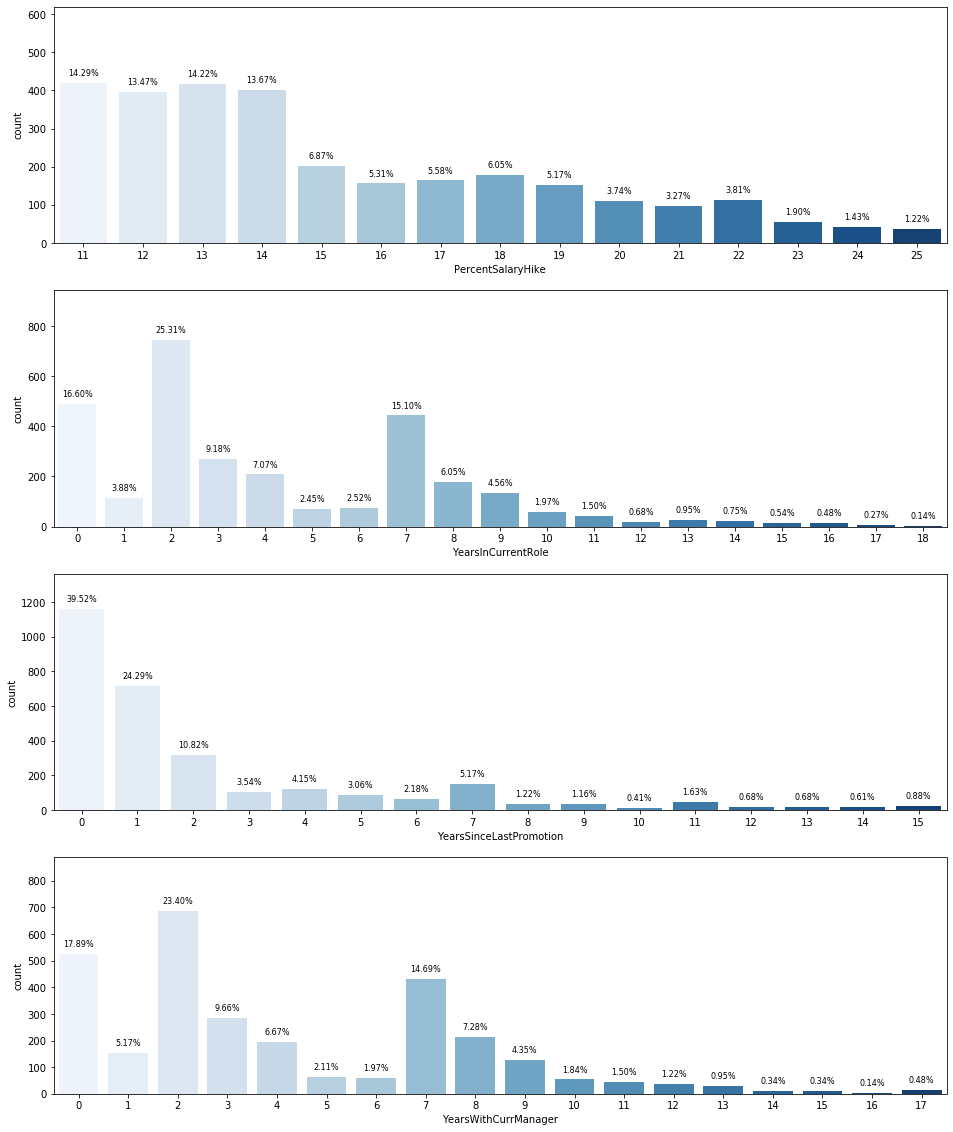

In [533]:
above10_ = [x for x in list(df.columns) if (len(df[x].unique()) > 10 and len(df[x].unique())<=20) ]
above10_
fig,axes = plt.subplots(4,1,figsize=(16,20))

for i in range(len(above10_)):
    axes[i].set_ylim(0,max(df[above10_[i]].value_counts())+200)
    #if plot_two.index[i]=='JobRole':
       # plt.setp(axes[i].get_xticklabels(),rotation=8)
    p = sns.countplot(df[above10_[i]],ax=axes[i],palette="Blues")
    for x in p.patches:
                p.annotate(str(format(x.get_height()/len(df)*100,'.2f'))+"%",(x.get_x()+x.get_width() / 2.,x.get_height()),
                           ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=8,fontweight='normal')
plt.show()

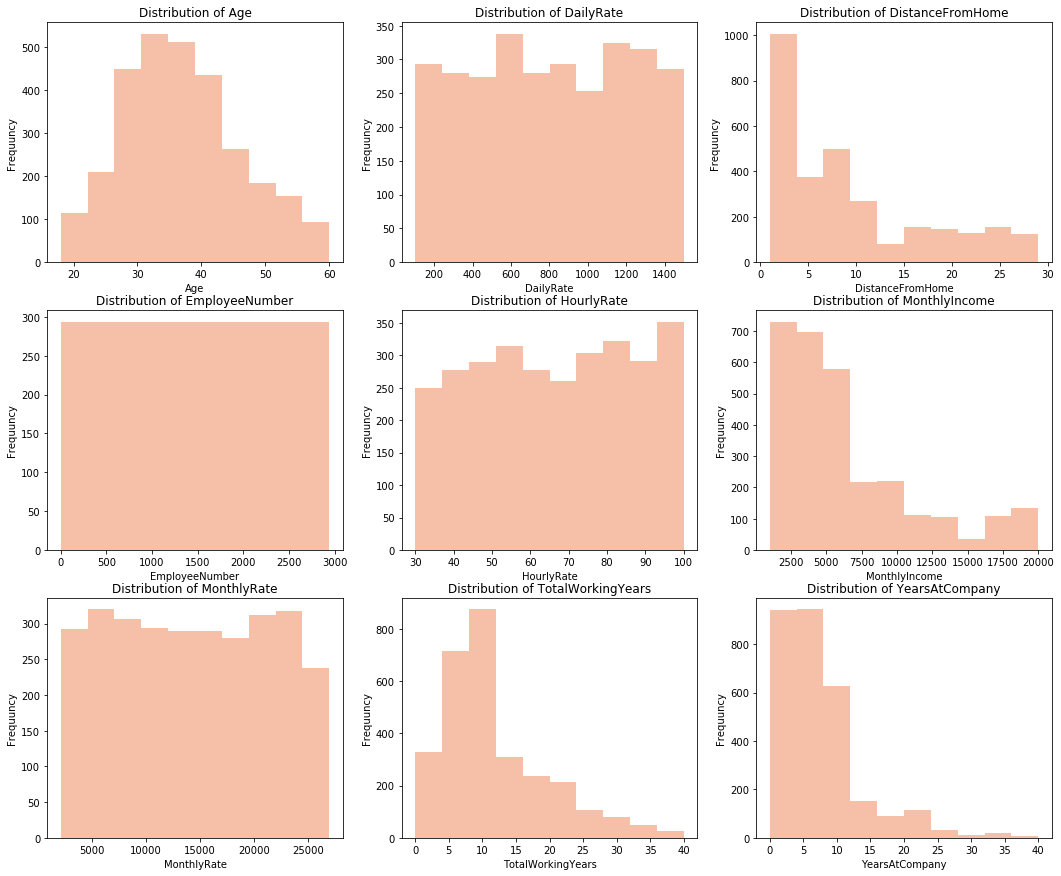

In [557]:
above20_ = [x for x in list(df.columns) if (len(df[x].unique()) > 20 ) ]
above20_ = np.array(above20_).reshape(3,3)
above20_

fig2 = plt.figure(figsize=(18,15),constrained_layout=False)
spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig2)
for i in range(3):
    for j in range(3):
        fig2.add_subplot(spec2[i,j]).hist(df[above20_[i][j]],color="#ea6227",alpha=0.4)
        fig2.add_subplot(spec2[i,j]).set_title("Distribution of {}".format(above20_[i][j]))
        fig2.add_subplot(spec2[i,j]).set_xlabel("{}".format(above20_[i][j]))
        fig2.add_subplot(spec2[i,j]).set_ylabel("Frequuncy")

###### Age data seems to follow normal distribution

###### Outlier detection in  features with continous variables

In [66]:
#visualising outliers in continous varialble 
for cols in X.columns.to_list():
    #if df[cols].dtypes== 'object':
    unique = len(X[cols].unique())
    condition = (unique >=30)
    if condition == True:
        print("Feature '{}' has {} unique categories".format(cols,unique))

Feature 'Age' has 43 unique categories
Feature 'DailyRate' has 886 unique categories
Feature 'HourlyRate' has 71 unique categories
Feature 'MonthlyIncome' has 1349 unique categories
Feature 'MonthlyRate' has 1427 unique categories
Feature 'TotalWorkingYears' has 40 unique categories
Feature 'YearsAtCompany' has 37 unique categories


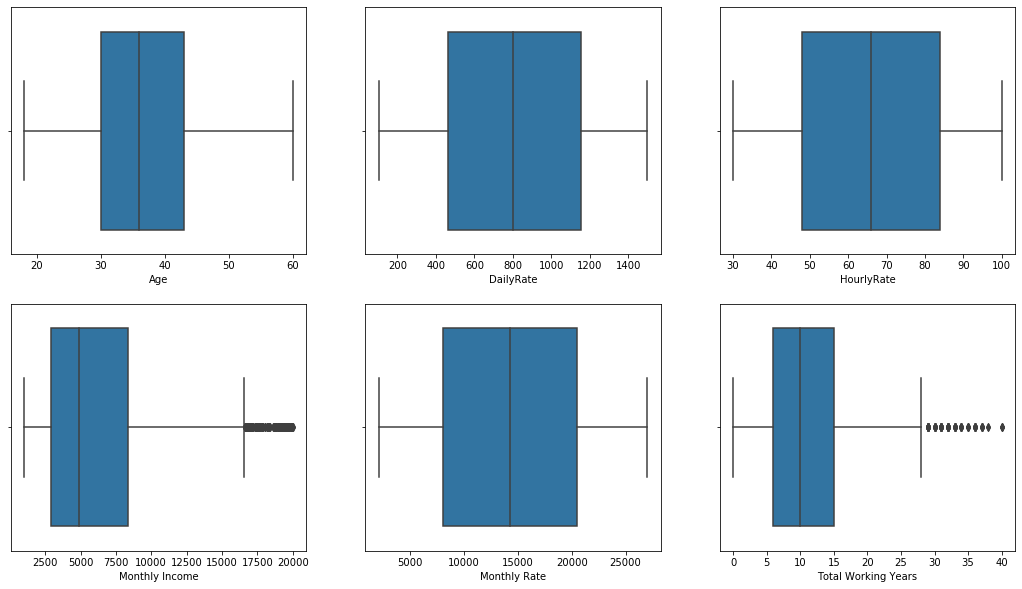

In [196]:
fig,axes = plt.subplots(2,3,figsize=(18,10))
sns.boxplot(['Age'],data=X,orient="h",ax=axes[0,0])
axes[0,0].set_xlabel("Age")
sns.boxplot(['DailyRate'],data=X,orient="h",ax=axes[0,1])
axes[0,1].set_xlabel("DailyRate")
sns.boxplot(['HourlyRate'],data=X,orient="h",ax=axes[0,2])
axes[0,2].set_xlabel("HourlyRate")
sns.boxplot(['MonthlyIncome'],data=X,orient="h",ax=axes[1,0])
axes[1,0].set_xlabel("Monthly Income")
sns.boxplot(['MonthlyRate'],data=X,orient="h",ax=axes[1,1])
axes[1,1].set_xlabel("Monthly Rate")
sns.boxplot(['TotalWorkingYears'],data=X,orient="h",ax=axes[1,2])
axes[1,2].set_xlabel("Total Working Years")
plt.show()

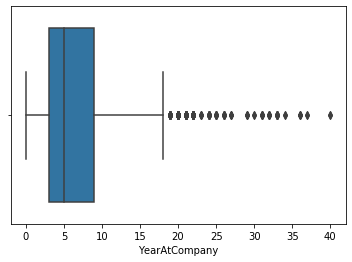

In [104]:
sns.boxplot(X['YearsAtCompany'])
plt.xlabel('YearAtCompany')
plt.show()

###### Monthly income , YearsAtCompany and TotalWorkingYears seems to have outliers

In [74]:
# function to get outliers Using Tukey Quartile
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5 * iqr
    ceiling = q3 + 1.5 * iqr
    outlier_indices =list(x.index[(x<floor) | (x>ceiling)])
    outlier_values = list(x[(x<floor) | (x > ceiling)])
    
    return outlier_indices,outlier_values

In [105]:
"""Age' has 43 unique categories
Feature 'DailyRate' has 886 unique categories
Feature 'HourlyRate' has 71 unique categories
Feature 'MonthlyIncome' has 1349 unique categories
Feature 'MonthlyRate' has 1427 unique categories
Feature 'TotalWorkingYears' has 40 unique categories
Feature 'YearsAtCompany' has 37 unique categories
"""
outlier_ind_MonthlyIncome,outlier_val_MonthlyIncome = find_outliers_tukey(X['MonthlyIncome'])
outlier_ind_TotalWorkingYears,outlier_val_TotalWorkingYears = find_outliers_tukey(X['TotalWorkingYears'])
outlier_ind_YearsAtCompany,outlier_val_YearsAtCompany = find_outliers_tukey(X['YearsAtCompany'])


In [106]:
print("Montly Income Outliers")
print(outlier_val_MonthlyIncome)

Montly Income Outliers
[19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880, 19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 170

In [114]:
print(" Total Working Years - Numbers: {} and total count {} ".format(set(outlier_val_TotalWorkingYears),
                                                                      len(outlier_val_TotalWorkingYears)))
print(outlier_val_TotalWorkingYears)

 Total Working Years - Numbers: {32, 33, 34, 35, 36, 37, 38, 40, 29, 30, 31} and total count 126 
[31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35, 31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35]


In [115]:
print(" Years in Company - Numbers : {} and total count {}".format(set(outlier_val_YearsAtCompany),
                                                                   len(outlier_val_YearsAtCompany)))
print(outlier_val_YearsAtCompany)

 Years in Company - Numbers : {32, 33, 34, 36, 37, 40, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31} and total count 208
[25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 24, 20, 24, 33, 20, 19, 22, 33, 24, 19, 21, 20, 36, 20, 20, 22, 24, 21, 21, 25, 21, 29, 20, 27, 20, 31, 32, 20, 20, 21, 22, 22, 34, 24, 26, 31, 20, 31, 26, 19, 21, 21, 32, 21, 19, 20, 22, 20, 21, 26, 20, 22, 24, 33, 29, 25, 21, 19, 19, 20, 19, 33, 19, 19, 20, 20, 20, 20, 20, 32, 20, 21, 33, 36, 26, 30, 22, 23, 23, 21, 21, 22, 22, 19, 22, 19, 22, 20, 20, 20, 22, 20, 20, 25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 24, 20, 24, 33, 20, 19, 22, 33, 24, 19, 21, 20, 36, 20, 20, 22, 24, 21, 21, 25, 21, 29, 20, 27, 20, 31, 32, 20, 20, 21, 22, 22, 34, 24, 26, 31, 20, 31, 26, 19, 21, 21, 32, 21, 19, 20, 22, 20, 21, 26, 20, 22, 24, 33, 29, 25, 21, 19, 19, 20, 19, 33, 19, 19, 20, 20, 20, 20, 20, 32, 20, 21, 33, 36, 26, 30, 22, 23, 23, 21, 21, 22, 22, 19, 22, 19, 22, 20, 20, 20, 22, 20, 20]


###### Examining each feature with respect to attrition 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [443]:
## function to plot histograms
colors = ["#ea6227","#f2a51a","#543864","#8ac6d1","#ff6363","#6983aa","#efa8e4","#f8e1f4","#fff0f5"]

def plot_histogram(x,color,bins=10):
    plt.hist(x,color=color,bins=bins)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(" Histogram of {}".format(x.name))
    
def plot_histogram_dv(x,y,val,alpha,label=None):
    plt.hist(x,color="#8ac6d1",label=x.name)
    plt.hist(x[y==val[0]],color="#f2a51a",alpha=alpha,label=val[0])
    plt.hist(x[y==val[1]],color="#efa8e4",alpha=alpha,label=val[1])
    plt.legend(loc='upper right',edgecolor="inherit")

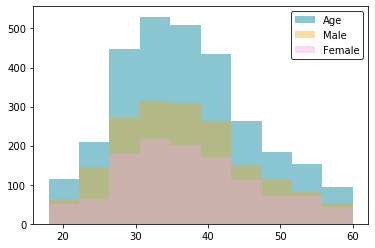

In [498]:
plot_histogram_dv(X['Age'],X['Gender'],val=['Male','Female'],label="so",alpha=0.4)

###### Number of Males Employees have higher distribution age wise 

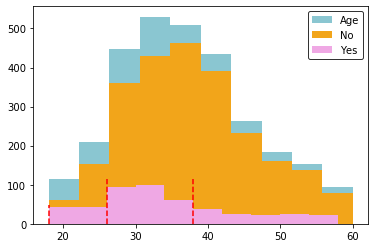

In [383]:
##Age vs Attrition rate 
plot_histogram_dv(X['Age'],X['Attrition'],val=['No','Yes'],label="so",alpha=1)
plt.plot([26,26],[0,115],linestyle='dashed',color='red')
plt.plot([38,38],[0,115],linestyle='dashed',color='red')
plt.plot([18,18],[0,48],linestyle='dashed',color='red')
plt.show()

#### Attrition among age group of 18-42 is higher than 42-60 , Highlighed in red dashed line 26-38 age group is more suseptible to leave the company however considering the non attrition age group 18-26 can have higher chances of leaving the company when looking at the frequency plot

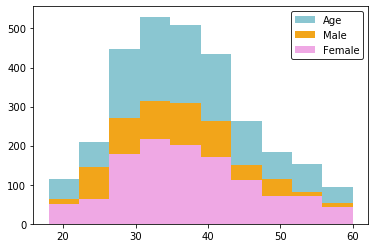

In [319]:
## Attrition among male employess vs female employess 
x = X[X['Attrition']=="Yes"] ## Data frame of attritioned employess
plot_histogram_dv(X['Age'],X['Gender'],val=['Male','Female'],label="so",alpha=1)

#### As shown above Male employees have higher chances of being susceptible to attrition However there may be bias as the male to female ratio in data set was not equal hence we cannot conclude which group of employess are more susceptable to leave the company

#### which departments do overall susceptible age group  Work for ??

In [355]:
department_age = X[(X['Age']>=26) & (X['Age']<=38)]

#plot_histogram_dv(da,X['Gender'],val=['Male','Female'],label="so",alpha=1)
def plot_histogram_dv3(x,y,val,alpha,label=None):
    plt.hist(x,color="#8ac6d1",label=x.name)
    plt.hist(x[y==val[0]],color="#f2a51a",alpha=alpha,label=val[0])
    plt.hist(x[y==val[1]],color="#efa8e4",alpha=alpha,label=val[1])
    plt.hist(x[y==val[2]],color="#543864",alpha=alpha,label=val[2])
    plt.legend(loc='best',edgecolor="inherit")

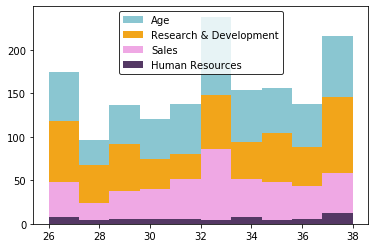

In [356]:
plot_histogram_dv3(department_age['Age'],department_age['Department'],['Research & Development','Sales',
                                                                       'Human Resources'],alpha=1,label='so')

###### Research and development department has more number of employees compared to other departments - (Ther may be bias as the employee count in Reasearch and development in data set is higher as shown below )


###### There seems to be unusual spread of employees ,26-38 age group dominate the employee count above 50%+ percentage in all departments

In [379]:
## Numerical verification of the above finding
x_ = department_age.Department.value_counts()
da_ = X.Department.value_counts()

for k,v in x_.items():
    print("{} department has {}% who belong to age group of 26-38 ".format(k,round((x_[k]/da_[k]) *100 ),4))

Research & Development department has 53.0% who belong to age group of 26-38 
Sales department has 55.0% who belong to age group of 26-38 
Human Resources department has 51.0% who belong to age group of 26-38 


#### what is the average earning potention of these age group ????

Average earning potention of 26-38 age group :5079.27
Checking for outlier in the group


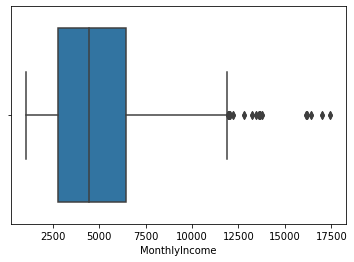

In [398]:
print("Average earning potention of 26-38 age group :{}".format(round(department_age['MonthlyIncome'].mean(),2)))
print("Checking for outlier in the group")
sns.boxplot(department_age['MonthlyIncome'])
plt.show()

In [435]:
de_outlier_indices,de_outlier_vals =find_outliers_tukey(department_age['MonthlyIncome'])
print("List of Monthly Income outliers in selected age group ",de_outlier_vals)

List of Monthly Income outliers in selected age group  [11994, 13458, 13664, 12185, 13675, 13603, 11996, 12061, 11935, 13610, 16184, 12808, 13582, 17444, 16124, 11916, 16422, 17007, 13206, 13744, 11994, 13458, 13664, 12185, 13675, 13603, 11996, 12061, 11935, 13610, 16184, 12808, 13582, 17444, 16124, 11916, 16422, 17007, 13206, 13744]


###### Which departments do outliers belong to ?

In [436]:
de_outlier_indices
empty = [ X.iloc[x,4] for x in de_outlier_indices ]
outlier_department_count = { x:empty.count(x) for x in set(empty)}
print("Departments of outlier ",outlier_department_count)

## what positions do these outliers hold in company
positions = [ X.iloc[x,13] for x in de_outlier_indices]
print("Job Role of outlier positions ",np.unique(positions))

Departments of outlier  {'Research & Development': 38, 'Sales': 2}
Job Role of outlier positions  ['Manager' 'Research Director']


###### Average earning potention of susceptible age group after removing outliers

In [423]:
average_earning = X.drop(index=de_outlier_indices)
print("Average earning potential after removing outliers ",round(average_earning['MonthlyIncome'].mean(),2))

Average earning potential after removing outliers  6401.86


###### Significant increase in monthly earning potential after removal of outliers from 5079 to 6401

In [432]:
#attrition count above average monthly earning potential
print("Attrition count below average earning potential ",
      department_age[(department_age['Attrition']=="Yes") & (department_age['MonthlyIncome']<6402)]['Age'].count())
print("Attrition count above average earning potential ",
      department_age[(department_age['Attrition']=="Yes") & (department_age['MonthlyIncome']>6402)]['Age'].count())

Attrition count below average earning potential  214
Attrition count above average earning potential  46


###### Indicates that the majority of susceptible age group of 26-38 are below average earning potential

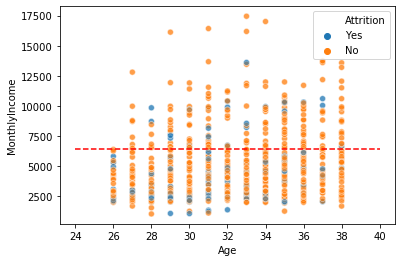

In [433]:
#scatter plot visualisation of Age vs Monthly Income of age group 26 - 38
sns.scatterplot(y=department_age['MonthlyIncome'],x=department_age['Age'],data=X,hue=X['Attrition'],alpha=0.5)
plt.plot([24,40],[6401,6401],linestyle='dashed',color='red') #Not a regression line just a average earning 
#line separating data points
plt.show()

##### How is the Environment Satisfaction for the suspectible age group ?

In [580]:
df['EnvironmentSatisfaction'].value_counts()

3    906
4    892
2    574
1    568
Name: EnvironmentSatisfaction, dtype: int64

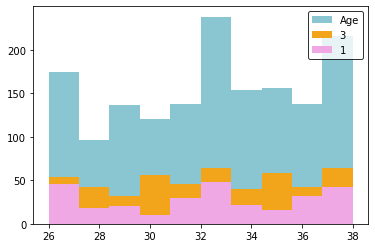

In [578]:
## Environment satisfaction rating or 3 & 1 
plot_histogram_dv(xy['Age'],xy['EnvironmentSatisfaction'],[3,1],alpha=1,label=None)

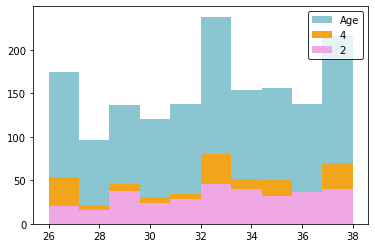

In [581]:
plot_histogram_dv(xy['Age'],xy['EnvironmentSatisfaction'],[4,2],alpha=1,label=None)

###### About ~ 40% seems to be un happy with environment they are working in suscpetible age group 26 - 38